In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

import seaborn as sns

In [ ]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True) # if return_X_y=True returns data, target; if as_frame=True returns as dataframe

In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
# in classif prob. we can do stratified partition: same proportion of target var. in train/test split as in the original data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_test.shape

(188,)

# Preprocessing

In [ ]:
# verify missing values
#X.isna().sum().sort_values(ascending=False)

y_asframe = pd.DataFrame(y)
y_asframe.isna().sum().sort_values(ascending=False)

,0
target,0


In [ ]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,188.0,14.259883,3.603682,7.760000,11.777500,13.650000,16.085000,28.11000
mean texture,188.0,19.157872,3.775656,10.890000,16.535000,18.905000,21.460000,29.33000
mean perimeter,188.0,92.954415,24.861402,47.920000,76.327500,87.630000,104.400000,188.50000
mean area,188.0,669.327128,377.542636,181.000000,425.150000,571.050000,799.100000,2501.00000
mean smoothness,188.0,0.097432,0.015914,0.052630,0.086420,0.097325,0.107525,0.16340
mean compactness,188.0,0.107041,0.052601,0.023440,0.067998,0.097535,0.130700,0.31140
mean concavity,188.0,0.090467,0.077430,0.000000,0.034050,0.066215,0.120175,0.42680
mean concave points,188.0,0.051085,0.039524,0.000000,0.022322,0.038555,0.074845,0.20120
mean symmetry,188.0,0.182586,0.026034,0.127400,0.163475,0.180900,0.196625,0.26550
mean fractal dimension,188.0,0.062910,0.006849,0.050440,0.058283,0.062235,0.065885,0.09744


## Standardize

In [ ]:
# only standardize, not scaling
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_train2 = pd.DataFrame(X_train1, index = X_train.index)
X_train2.columns = X_train.columns.values
X_train = pd.DataFrame(X_train2)

X_test1 = scaler.fit_transform(X_test)
X_test2 = pd.DataFrame(X_test1, index=X_test.index)
X_test2.columns = X_test.columns.values
X_test = pd.DataFrame(X_test2)

# PCA

<Axes: >

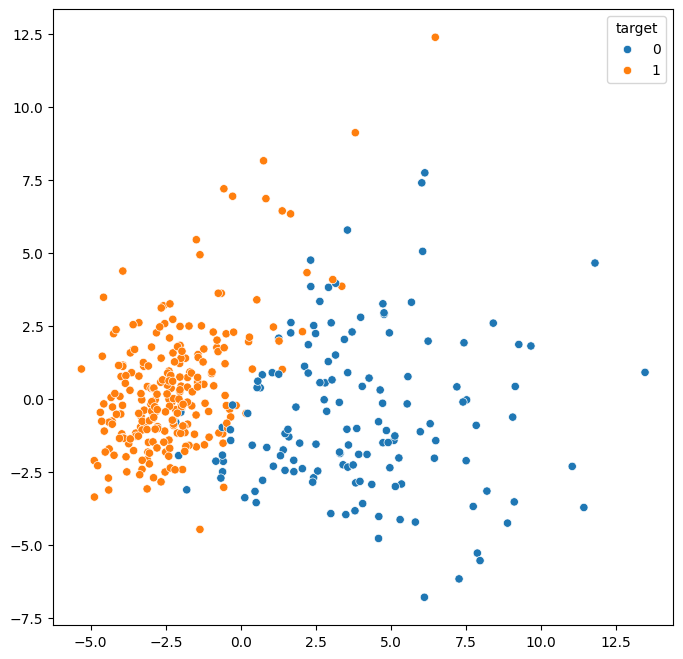

In [ ]:
pca = PCA().fit(X_train)
X_train_transf = pca.transform(X_train)
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_train_transf[:,0], y=X_train_transf[:,1], hue=y_train)

# LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, X_train, y_train, cv=10)))

0.9578947368421054


Weights: 


<Axes: >

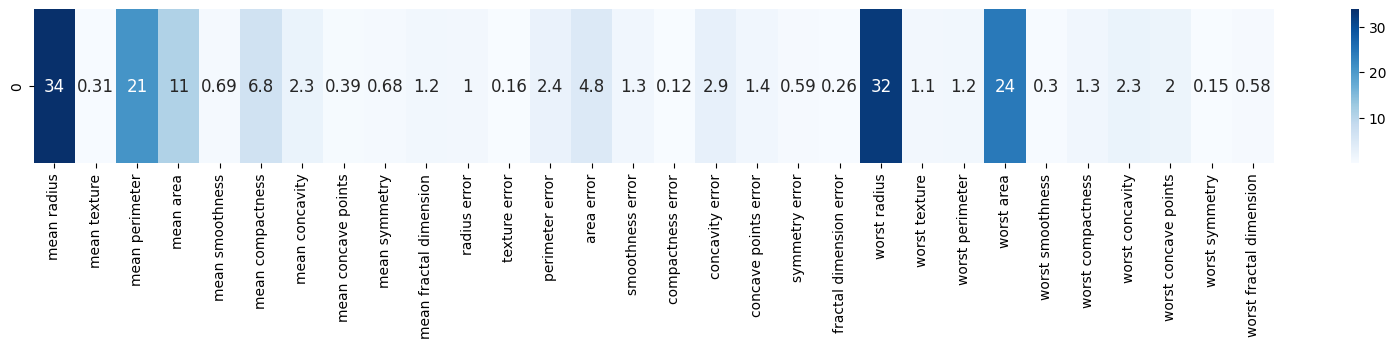

In [ ]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Weights: ')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X.columns

# weights magnitude = importance in class prediction
plt.figure(figsize=(20,2))
sns.heatmap(coefs.abs(), annot=True, cmap='Blues', annot_kws={'size':12})

## classif. report

In [ ]:
print(classification_report(lda_model.predict(X_test), y_test, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.89      0.98      0.93        63
           B       0.99      0.94      0.96       125

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.96      0.95      0.95       188



## Confusion matrix

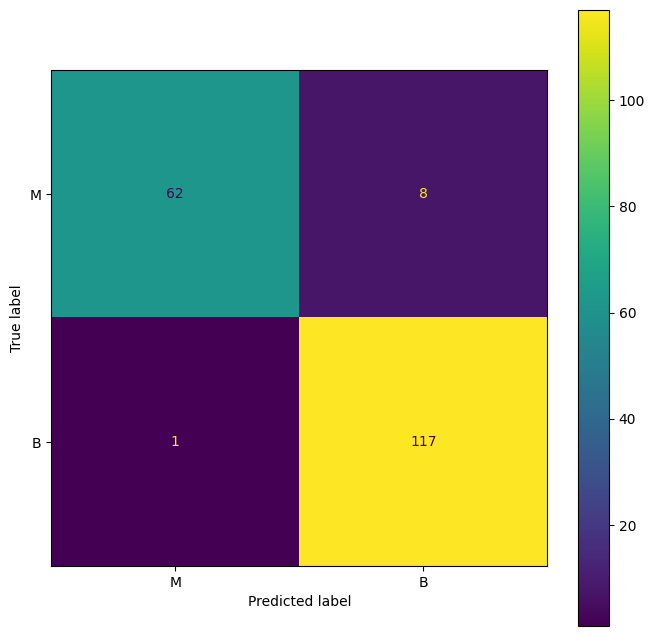

In [ ]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lda_model,X_test, y_test, display_labels=['M', 'B'], ax=plt.subplot())


 TP-117; FP-8; TN- 62; FN-1

## ROC curve

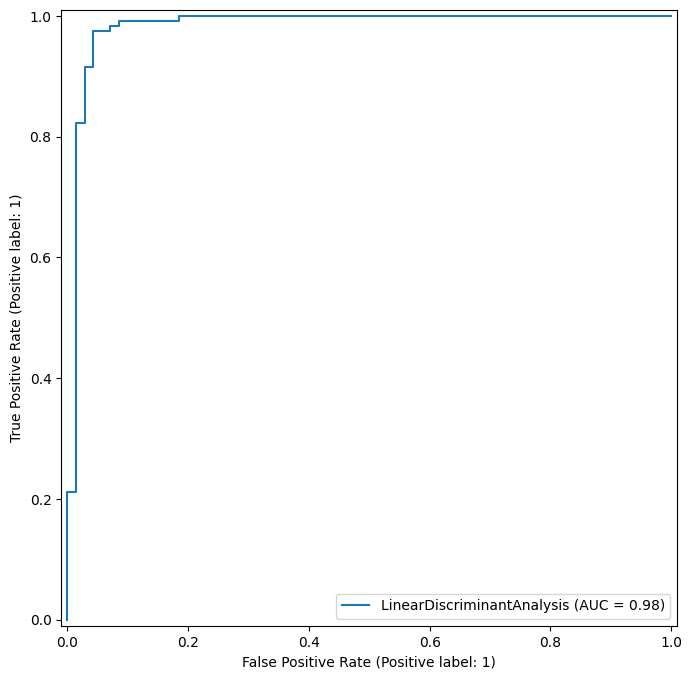

In [ ]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(lda_model, X_test, y_test, ax=plt.subplot())

## Precision-recall curve

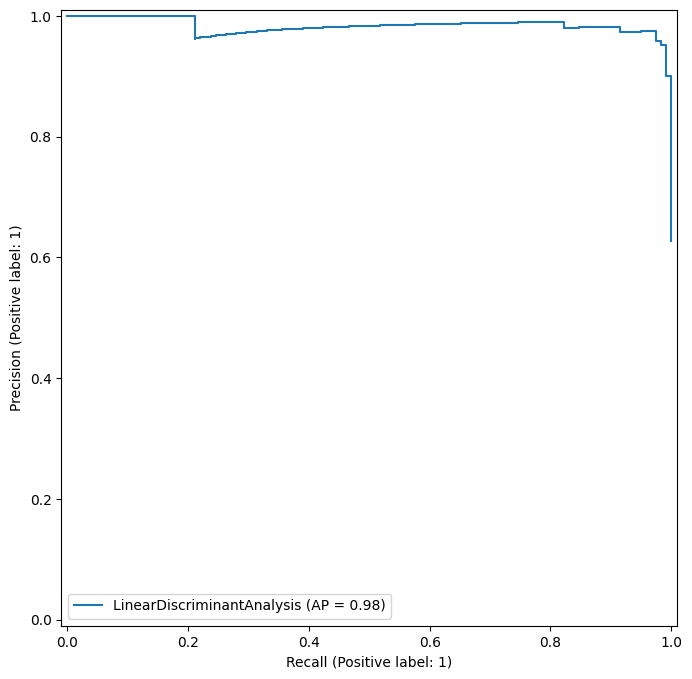

In [ ]:
plt.figure(figsize=(8,8))
PrecisionRecallDisplay.from_estimator(lda_model, X_test, y_test, ax=plt.subplot())

# Naive Bayes

In [ ]:
nb = GaussianNB()
print(np.mean(cross_val_score(nb, X_train, y_train, cv=10)))

0.9369095816464237


## classif report

In [ ]:
nb_model = GaussianNB().fit(X_train, y_train)
print(classification_report(nb_model.predict(X_test), y_test, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.89      0.95      0.92        65
           B       0.97      0.93      0.95       123

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



## Confusion matrix

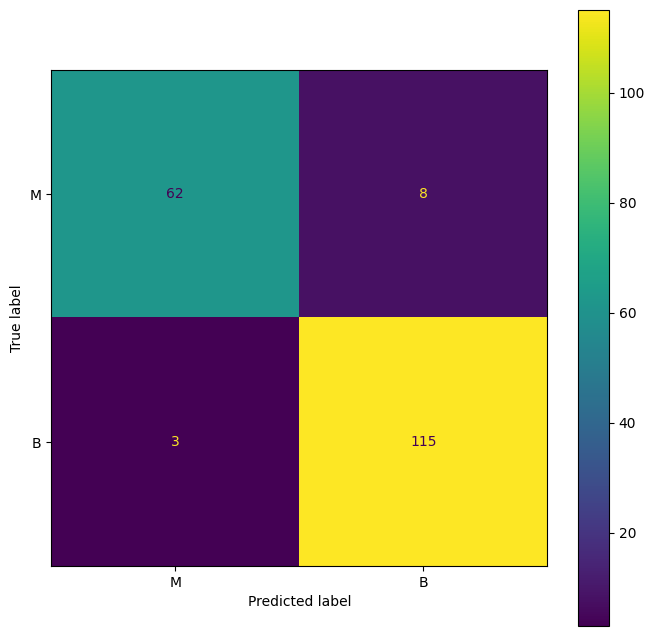

In [ ]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(nb_model,X_test, y_test, display_labels=['M', 'B'], ax=plt.subplot())


## ROC curve

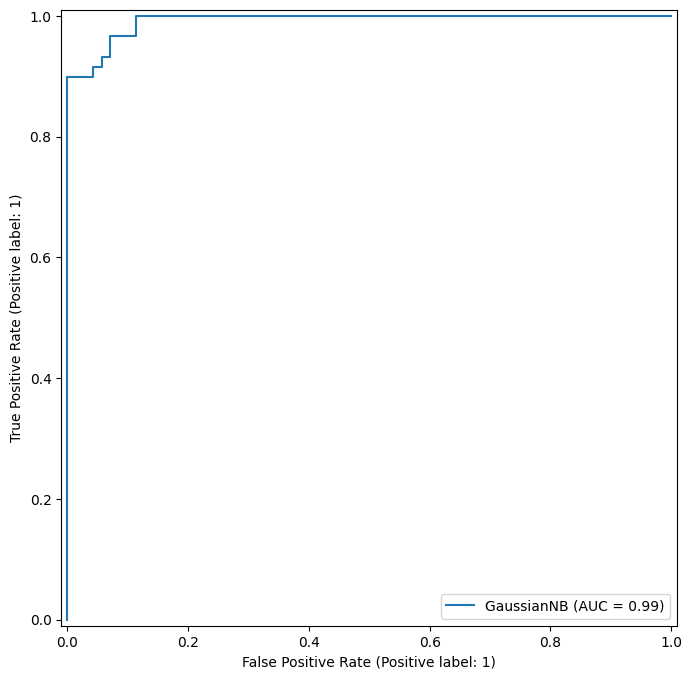

In [ ]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(nb_model, X_test, y_test, ax=plt.subplot())

## Precision-recall curve

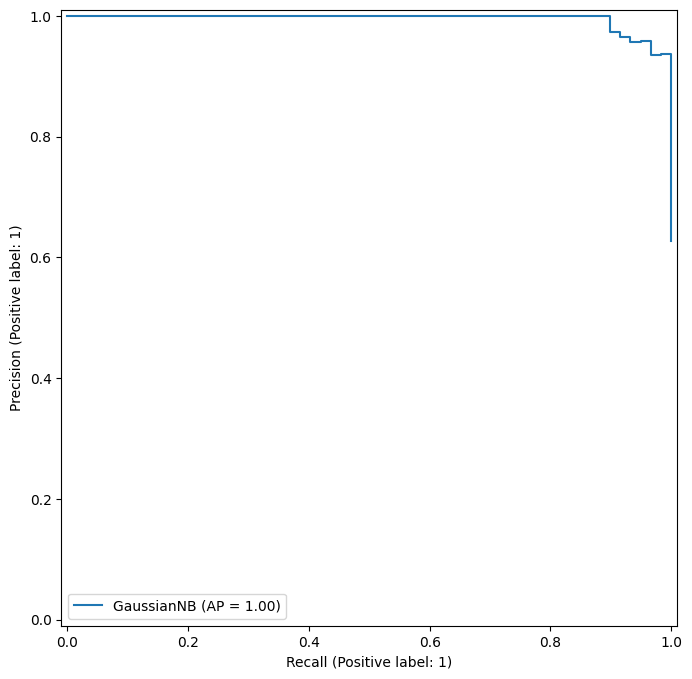

In [ ]:
plt.figure(figsize=(8,8))
PrecisionRecallDisplay.from_estimator(nb_model, X_test, y_test, ax=plt.subplot())

# Quadratic classifier

In [ ]:
qda = QuadraticDiscriminantAnalysis()
print(np.mean(cross_val_score(qda, X_train, y_train, cv=10)))

0.944804318488529


In [ ]:
param = {'reg_param':np.linspace(0,1,21, endpoint = True)}
qda_gs = GridSearchCV(qda, param_grid=param, cv=10, n_jobs = -1, refit=True)
qda_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

Looks like we instantiate the model Quadratic D.A. and then we fit it with GridSearchCV - I need to understand more

In [ ]:
show_html(pd.DataFrame(qda_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head(15).to_html())

,params,mean_test_score,rank_test_score
10,{'reg_param': 0.5},0.968489,1
4,{'reg_param': 0.2},0.968489,1
5,{'reg_param': 0.25},0.968489,1
6,{'reg_param': 0.30000000000000004},0.968489,1
11,{'reg_param': 0.55},0.968489,1
9,{'reg_param': 0.45},0.968489,1
1,{'reg_param': 0.05},0.965857,7
2,{'reg_param': 0.1},0.965857,7
3,{'reg_param': 0.15000000000000002},0.965857,7
12,{'reg_param': 0.6000000000000001},0.965857,10


## classif report

In [ ]:

print(classification_report(qda_gs.predict(X_test), y_test, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.96      0.97      0.96        69
           B       0.98      0.97      0.98       119

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



## Confusion matrix

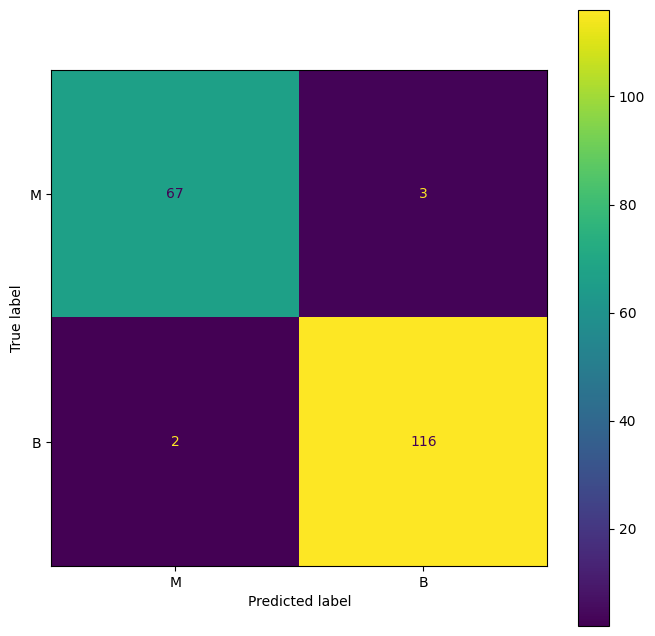

In [ ]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(qda_gs,X_test, y_test, display_labels=['M', 'B'], ax=plt.subplot())


# Logistic regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
print(np.mean(cross_val_score(lr, X_train, y_train, cv=10))) # returns accuracy

0.976315789473684


In [ ]:
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint = True)}
#n_jobs = no. of jobs to run in parallel
lr_gs = GridSearchCV(lr, param, cv=10, n_jobs = -1, refit = True)
lr_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.99526231e-03, 3.98107171e-03, 7.94328235e-03,
       1.58489319e-02, 3.16227766e-02, 6.30957344e-02, 1.25892541e-01,
       2.51188643e-01, 5.01187234e-01, 1.00000000e+00, 1.99526231e+00,
       3.98107171e+00, 7.94328235e+00, 1.58489319e+01, 3.16227766e+01,
       6.30957344e+01, 1.25892541e+02, 2.51188643e+02, 5.01187234e+02,
       1.00000000e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head(15).to_html())

,params,mean_test_score,rank_test_score
19,"{'C': 0.501187233627272, 'penalty': 'l2'}",0.978947,1
17,"{'C': 0.25118864315095796, 'penalty': 'l2'}",0.978947,1
15,"{'C': 0.12589254117941676, 'penalty': 'l2'}",0.978947,1
13,"{'C': 0.0630957344480193, 'penalty': 'l2'}",0.976316,4
21,"{'C': 1.0, 'penalty': 'l2'}",0.976316,5
11,"{'C': 0.03162277660168379, 'penalty': 'l2'}",0.973684,6
23,"{'C': 1.9952623149688788, 'penalty': 'l2'}",0.968421,7
25,"{'C': 3.981071705534969, 'penalty': 'l2'}",0.963158,8
9,"{'C': 0.015848931924611134, 'penalty': 'l2'}",0.960526,9
29,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.957895,10


## Weights of attributes

Coefs:


<Axes: >

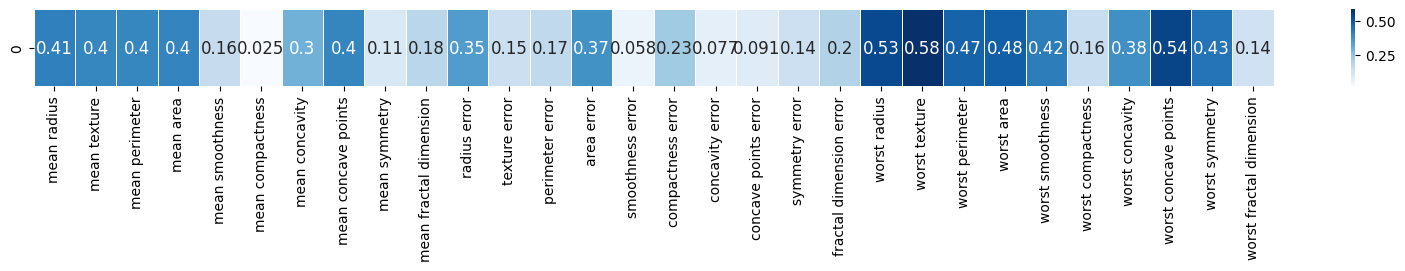

In [ ]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = X.columns

plt.figure(figsize=(20,1))
sns.heatmap(coefs.abs(),annot=True, linewidths=0.5, cbar=True, xticklabels=True, cmap='Blues', annot_kws={'size':12})

## classif report

In [ ]:

print(classification_report(lr_gs.predict(X_test), y_test, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.97      0.99      0.98        69
           B       0.99      0.98      0.99       119

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



## Confusion matrix

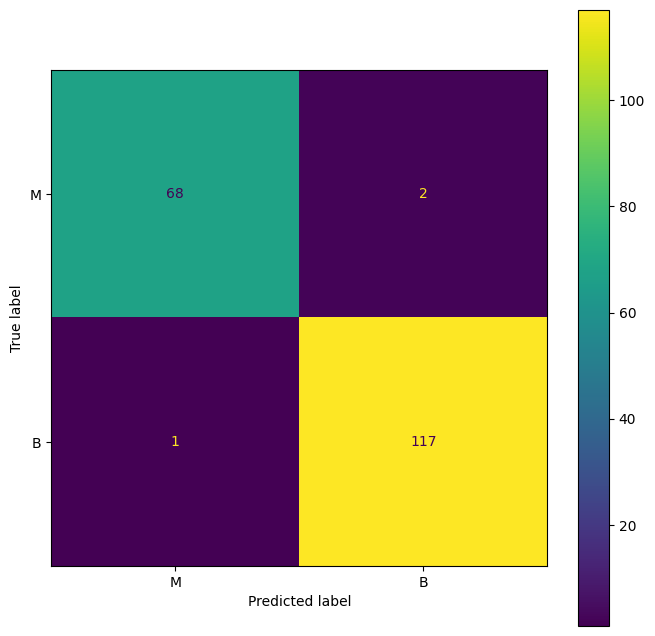

In [ ]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lr_gs,X_test, y_test, display_labels=['M', 'B'], ax=plt.subplot())
